<a href="https://colab.research.google.com/github/Chandan-devraj/Capstone-Project/blob/main/Lora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/huggingface/diffusers
!pip install accelerate wand
!pip install -r https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/requirements.txt

!accelerate config default
# accelerate configuration saved at $HOME/.cache/huggingface/accelerate/default_config.yaml

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-_wlp9c3p
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-_wlp9c3p
  Resolved https://github.com/huggingface/diffusers to commit dac623b59f52c58383a39207d5147aa34e0047cd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-py3-none-any.whl size=2932744 sha256=74065e22bef05421484c1f3a94c787bc90bb0465a170e53ca160ac794cc33660
  Stored in directory: /tmp/pip-ephem-wheel-cache-jeyiqy2z/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.3
    Uninstalling diffusers-0.30.3:
      Successfully uninstalled diffusers-0.30.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 3.6 MB/s et

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget -q https://raw.githubusercontent.com/huggingface/diffusers/main/examples/text_to_image/train_text_to_image_lora.py

In [ ]:
!accelerate launch --mixed_precision="bf16"  train_text_to_image_lora.py \
  --pretrained_model_name_or_path='runwayml/stable-diffusion-v1-5' \
  --dataset_name="Chandan005/Short-dataset-text" \
  --dataloader_num_workers=8 \
  --resolution=512 \
  --center_crop \
  --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=1500 \
  --learning_rate=1e-09 \
  --max_grad_norm=1 \
  --lr_scheduler="cosine" \
  --lr_warmup_steps=0 \
  --output_dir='/content/drive/MyDrive/Fine-Tune-LORA' \
  --checkpointing_steps=500 \
  --caption_column="text" \
  --validation_prompt="smiling" \
  --seed=1337

2024-11-11 09:06:12.615527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-11 09:06:12.634757: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-11 09:06:12.640761: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 09:06:12.654798: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-11 09:06:13.845508: W tensorflow/comp

In [ ]:
from diffusers import StableDiffusionPipeline, PNDMScheduler
import torch

# Path to the LoRA checkpoint
model_path = "/content/drive/MyDrive/Fine-Tune-LORA/checkpoint-1500"  # Using desired fine tuned checkpoint path
pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipeline.unet.load_attn_procs(model_path)
pipeline.scheduler = PNDMScheduler.from_config(pipeline.scheduler.config)
pipeline = pipeline.to("cuda")


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
prompt="A boy with smiling full face has black hairs"
with torch.autocast("cuda"):
    image = pipeline(prompt).images[0]
image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
output_path = "/content/generated_image.png"  # Save to a path in Colab's file system
image.save(output_path)
print(f"Image saved at {output_path}")

Image saved at /content/generated_image.png


In [ ]:
!pip install fastapi uvicorn diffusers transformers accelerate safetensors torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 2l8YfvQ1ualZSFKnkVa5941Fv7t_5vojAZv4wzHULwcfKkGcC


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# Install dependencies
!pip install fastapi uvicorn pyngrok diffusers transformers accelerate torch torchvision Pillow

# Import required modules
import torch
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from diffusers import StableDiffusionPipeline

from pyngrok import ngrok

# Define the FastAPI app
app = FastAPI()

# Define the model path (Update this if needed)
model_path = "/content/drive/MyDrive/Fine-Tune-LORA/pytorch_lora_weights.safetensors"

# Load the model
print("Loading the model...")
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")  # Base model
pipe.load_lora_weights(model_path)  # Load fine-tuned LoRA weights
pipe.to("cuda")  # Ensure the model runs on GPU if available
print("Model loaded successfully!")

# Define request structure
class Prompt(BaseModel):
    text: str

# Define routes
@app.get("/")
def read_root():
    return {"message": "Server is up and running!"}

@app.post("/generate")
async def generate_image(prompt: Prompt):
    try:
        print(f"Generating image for prompt: {prompt.text}")
        image = pipe(prompt.text).images[0]  # Generate the image
        output_path = "/content/output.png"
        image.save(output_path)  # Save the image
        return {"message": "Image generated successfully!", "output_path": output_path}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

# Start the Ngrok tunnel
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# Run the server
import uvicorn
uvicorn.run(app, host="0.0.0.0", port=8000)


Loading the model...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-1' coro=<Server.serve() done, defined at /usr/local/lib/python3.10/dist-packages/uvicorn/server.py:67> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 65, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.10/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/lib/python3.10/asyncio/tasks.py", l

Model loaded successfully!
Public URL: NgrokTunnel: "https://1285-34-19-14-107.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [184]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     152.58.194.78:0 - "GET / HTTP/1.1" 200 OK
INFO:     152.58.194.78:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     54.86.50.139:0 - "POST / HTTP/1.1" 405 Method Not Allowed
Generating image for prompt: A futuristic city with flying cars


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:     54.86.50.139:0 - "POST /generate HTTP/1.1" 200 OK
INFO:     152.58.194.78:0 - "OPTIONS /generate HTTP/1.1" 405 Method Not Allowed
INFO:     152.58.194.78:0 - "OPTIONS /generate HTTP/1.1" 405 Method Not Allowed
INFO:     152.58.194.78:0 - "OPTIONS /generate HTTP/1.1" 405 Method Not Allowed
INFO:     152.58.194.78:0 - "OPTIONS /generate HTTP/1.1" 405 Method Not Allowed
INFO:     152.58.194.78:0 - "OPTIONS /generate HTTP/1.1" 405 Method Not Allowed
Generating image for prompt: A boy with smiling face with black hair


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:     54.86.50.139:0 - "POST /generate HTTP/1.1" 200 OK
INFO:     152.58.194.78:0 - "OPTIONS /generate HTTP/1.1" 405 Method Not Allowed
INFO:     152.58.194.78:0 - "OPTIONS /generate HTTP/1.1" 405 Method Not Allowed
INFO:     152.58.194.78:0 - "OPTIONS /generate HTTP/1.1" 405 Method Not Allowed
INFO:     152.58.194.78:0 - "POST /generate HTTP/1.1" 422 Unprocessable Entity
INFO:     152.58.194.78:0 - "POST /generate HTTP/1.1" 422 Unprocessable Entity
INFO:     152.58.194.78:0 - "POST /generate HTTP/1.1" 422 Unprocessable Entity
INFO:     152.58.194.78:0 - "POST /generate HTTP/1.1" 422 Unprocessable Entity
INFO:     152.58.194.78:0 - "POST /generate HTTP/1.1" 422 Unprocessable Entity
INFO:     152.58.194.78:0 - "POST /generate HTTP/1.1" 422 Unprocessable Entity
Generating image for prompt: cars


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:     54.86.50.139:0 - "POST /generate HTTP/1.1" 200 OK
INFO:     152.58.194.78:0 - "GET /content/output.png HTTP/1.1" 404 Not Found
INFO:     54.86.50.139:0 - "GET /content/output.png HTTP/1.1" 404 Not Found
INFO:     54.86.50.139:0 - "GET /generate HTTP/1.1" 405 Method Not Allowed
INFO:     152.58.194.78:0 - "POST /generate HTTP/1.1" 422 Unprocessable Entity
INFO:     152.58.194.78:0 - "GET /generate HTTP/1.1" 405 Method Not Allowed
INFO:     152.58.194.78:0 - "OPTIONS /generate HTTP/1.1" 405 Method Not Allowed
INFO:     152.58.194.78:0 - "OPTIONS /generate HTTP/1.1" 405 Method Not Allowed
INFO:     152.58.194.78:0 - "OPTIONS /generate HTTP/1.1" 405 Method Not Allowed
INFO:     152.58.194.78:0 - "OPTIONS /generate HTTP/1.1" 405 Method Not Allowed


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [184]


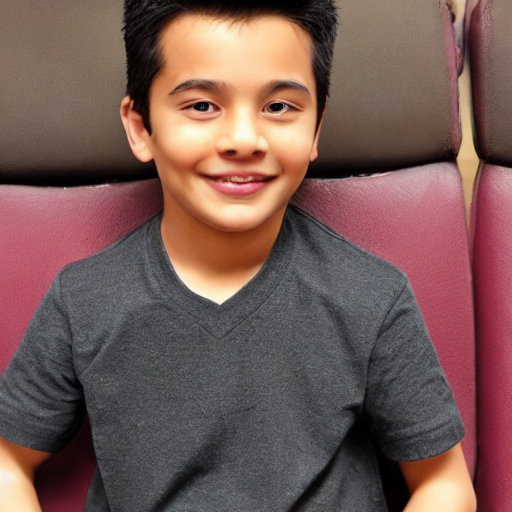

In [ ]:
display(image)

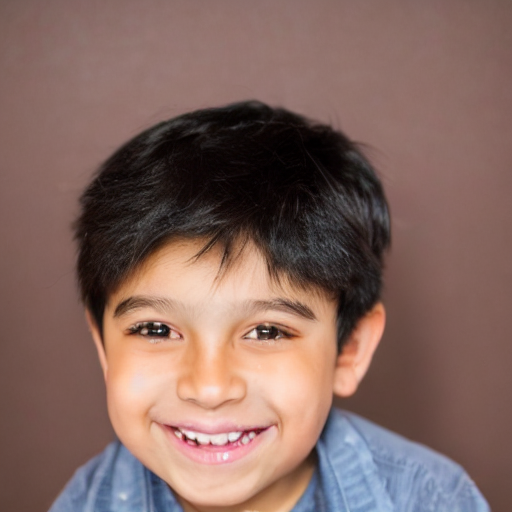

In [ ]:
display(image)